In [4]:
# PyTorch와 TorchVision 설치 - 딥러닝 모델을 구현하고 훈련시키는 데 필요한 라이브러리
!pip install torch torchvision

# Detectron2 설치 - Facebook AI Research에서 개발한 객체 탐지 라이브러리
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Bullet Physics SDK 설치 - 물리 시뮬레이션을 위한 라이브러리
!apt-get install -y bullet

# PyBullet 설치 - Python에서 Bullet Physics 라이브러리를 사용하기 위한 인터페이스
!pip install pybullet

# OpenCV, Matplotlib, NumPy 설치 - 이미지 처리, 데이터 시각화 및 수치 계산을 위한 라이브러리
!pip install opencv-python-headless matplotlib numpy

# Ultralytics YOLO 설치 - 실시간 객체 탐지를 위한 YOLO 모델을 사용하기 위한 패키지
!pip install ultralytics

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-izztocpg
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-izztocpg
  Resolved https://github.com/facebookresearch/detectron2.git to commit b1c43ffbc995426a9a6b5c667730091a384e0fa4
  Preparing metadata (setup.py) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package bullet
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 38.6 MB/s eta 0:00:00



image 1/1 /content/drive/MyDrive/AIFFEL/Aiffelthon/EngineTest/myball.png: 384x640 1 person, 1 baseball glove, 1 tv, 9.4ms
Speed: 2.3ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Detected ball coordinates: [[     801.18       403.4      1279.9      714.82]
 [       1084      443.85      1243.2      556.21]
 [      92.74      3.4456      1251.9      659.48]]


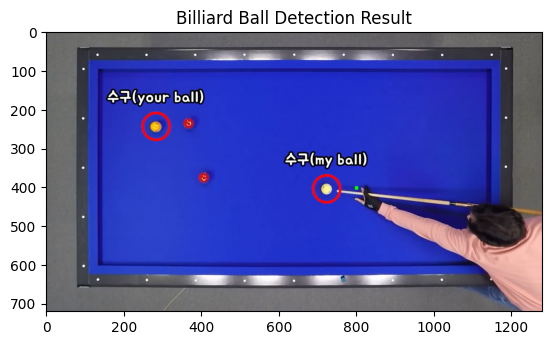

In [11]:
import cv2
import numpy as np
import torch
import pybullet as p
import matplotlib.pyplot as plt
from ultralytics import YOLO

# YOLO model load and ball detection function
def detect_balls_with_yolo(image_path):
    model = YOLO('yolov8n.pt')  # YOLOv8 Nano model (light and fast)
    results = model(image_path)
    detections = results[0].boxes.xyxy.cpu().numpy()  # Detected ball coordinates
    return detections

# Simulation of the trajectory of balls on a billiard table
def simulate_shot(cue_ball, target_ball_1, target_ball_2, cushion_count):
    p.connect(p.DIRECT)
    p.setGravity(0, 0, -10)

    cue_ball_pos = np.array(cue_ball[:2])  # Use only XY coordinates
    target_1_pos = np.array(target_ball_1[:2])
    target_2_pos = np.array(target_ball_2[:2])

    cue_ball_id = p.createCollisionShape(p.GEOM_SPHERE, radius=0.028)
    p.createMultiBody(0.17, cue_ball_id, basePosition=cue_ball_pos.tolist())

    for i in range(240):
        p.stepSimulation()
        if is_collision(cue_ball_pos, target_1_pos):
            print("Hit the first target ball!")
            break
    p.disconnect()

# Check for collision between balls
def is_collision(pos1, pos2, threshold=0.03):
    return np.linalg.norm(np.array(pos1) - np.array(pos2)) < threshold

# Visualization function
def visualize_shot(image_path, trajectory):
    image = cv2.imread(image_path)
    for point in trajectory:
        cv2.circle(image, tuple(map(int, point)), 5, (0, 255, 0), -1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Billiard Ball Detection Result")
    plt.show()

# Main function controlling the entire flow
def main():
    image_path = "/content/drive/MyDrive/AIFFEL/Aiffelthon/EngineTest/myball.png"
    balls = detect_balls_with_yolo(image_path)
    print("Detected ball coordinates:", balls)

    if len(balls) < 3:
        print("Insufficient ball position information.")
        return

    cue_ball, target_ball_1, target_ball_2 = balls[0], balls[1], balls[2]
    simulate_shot(cue_ball, target_ball_1, target_ball_2, 2)
    visualize_shot(image_path, [(cue_ball[0], cue_ball[1])])

main()


image 1/1 /content/drive/MyDrive/AIFFEL/Aiffelthon/EngineTest/myball.png: 384x640 1 person, 1 baseball glove, 1 tv, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


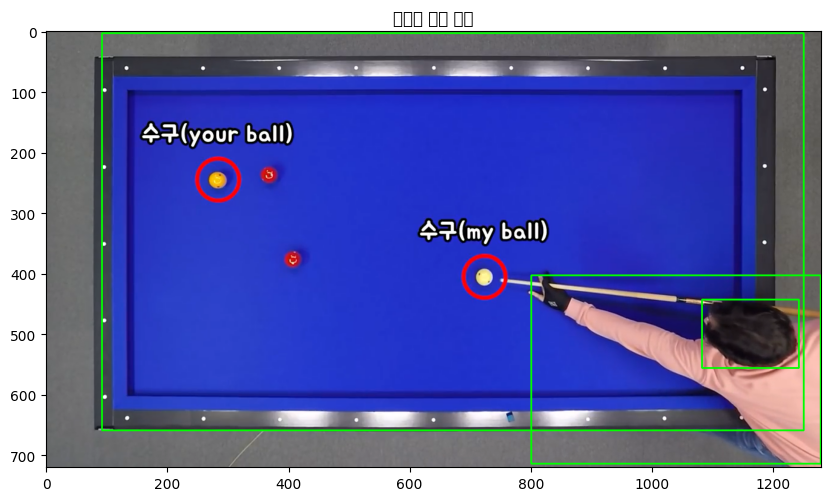

In [13]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# YOLO 모델 불러오기
model = YOLO('yolov8n.pt')  # YOLOv8 Nano 모델 (빠름)

# 이미지 불러오기
image_path = "/content/drive/MyDrive/AIFFEL/Aiffelthon/EngineTest/myball.png"
image = cv2.imread(image_path)

# 당구공 탐지
results = model(image_path)
detections = results[0].boxes.xyxy.cpu().numpy()  # 탐지된 공의 좌표 (x1, y1, x2, y2)
colors = ['red', 'yellow', 'white']  # 당구공 색상

# 공 시각화
for box in detections:
    x1, y1, x2, y2 = box[:4]
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# 이미지 출력
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("당구공 탐지 결과")
plt.show()


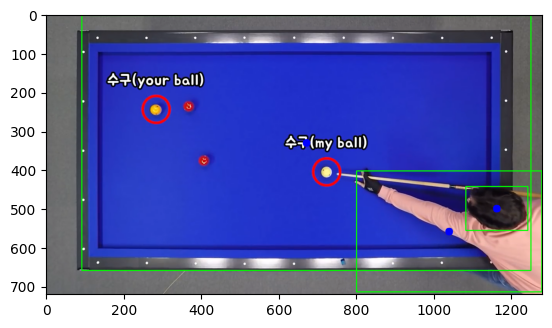

In [14]:
import numpy as np

def simulate_no_cushion_shot(cue_ball, target_1, target_2):
    # 공의 위치
    cue_x, cue_y = (cue_ball[0] + cue_ball[2]) / 2, (cue_ball[1] + cue_ball[3]) / 2
    target1_x, target1_y = (target_1[0] + target_1[2]) / 2, (target_1[1] + target_1[3]) / 2
    target2_x, target2_y = (target_2[0] + target_2[2]) / 2, (target_2[1] + target_2[3]) / 2

    # 궤적 계산 (단순 직선 경로)
    trajectory = [(cue_x, cue_y), (target1_x, target1_y), (target2_x, target2_y)]

    # 시각화
    for point in trajectory:
        cv2.circle(image, tuple(map(int, point)), 10, (255, 0, 0), -1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# 탐지된 공을 첫 공, 두 번째 공으로 설정해 궤적 계산
simulate_no_cushion_shot(detections[0], detections[1], detections[2])

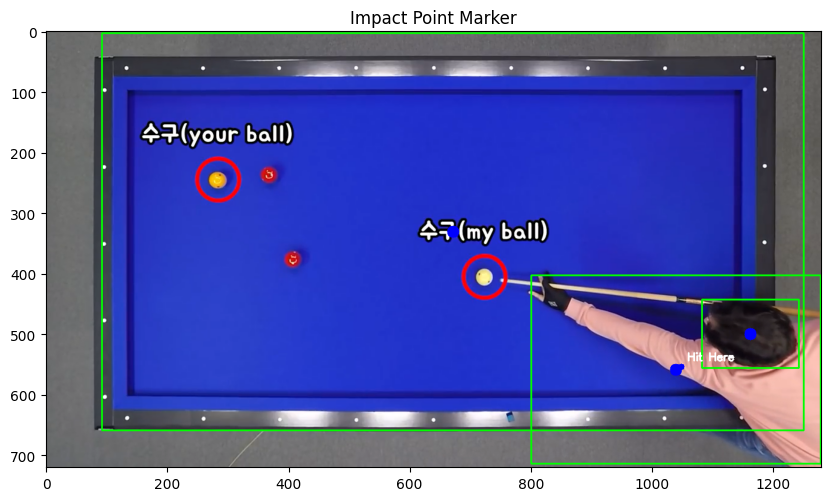

In [17]:
def show_hit_point(image, cue_ball, target_1):
    # 흰 공과 1적구 중심 좌표 계산
    cue_x, cue_y = (cue_ball[0] + cue_ball[2]) / 2, (cue_ball[1] + cue_ball[3]) / 2
    target_x, target_y = (target_1[0] + target_1[2]) / 2, (target_1[1] + target_1[3]) / 2

    # 방향 벡터 계산 (단위 벡터)
    direction = np.array([target_x - cue_x, target_y - cue_y])
    direction = direction / np.linalg.norm(direction)

    # 명중 지점 (흰 공 위 약간 앞 지점)
    hit_x = cue_x + direction[0] * 10  # 거리 조정
    hit_y = cue_y + direction[1] * 10

    # 이미지에 명중 지점 표시
    marked_image = image.copy()
    cv2.circle(marked_image, (int(hit_x), int(hit_y)), 5, (255, 0, 0), -1)  # 파란 점으로 표시
    cv2.putText(marked_image, "Hit Here", (int(hit_x) + 10, int(hit_y) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # 이미지 출력
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
    plt.title("Impact Point Marker")  # 명중 지점 표시
    plt.show()

# 흰 공과 1적구를 넣어 명중 지점을 시각화
show_hit_point(image, detections[0], detections[1])


# **흰 공 확대 및 명중 지점 시각화 코드**

[ 원리 설명 ]
- 수구 정면 시점을 원형 이미지로 생성합니다.
- 공의 표면 기준으로 명중 지점을 표시합니다.
- 사용자가 스마트폰 화면을 통해 수구 표면의 어느 위치를 쳐야 하는지 시각적으로 안내합니다.

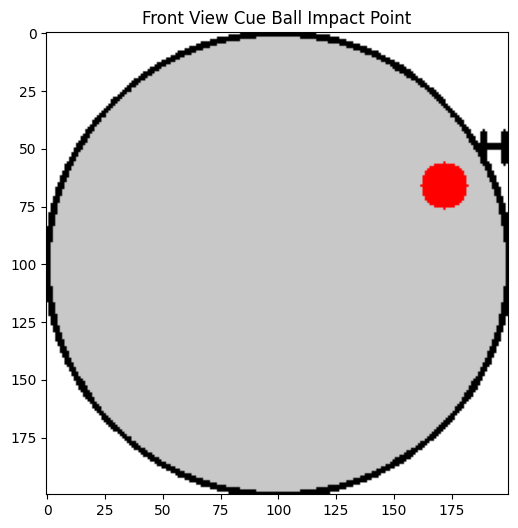

In [18]:
def show_front_hit_point(cue_ball, target_1):
    # 흰 공 반지름 및 중심
    radius = 100  # 화면에 표시할 흰 공 반지름 (픽셀 단위)
    center = (radius, radius)  # 중심 좌표 (정면 이미지 중앙)

    # 목표 방향 벡터 계산
    cue_x, cue_y = (cue_ball[0] + cue_ball[2]) / 2, (cue_ball[1] + cue_ball[3]) / 2
    target_x, target_y = (target_1[0] + target_1[2]) / 2, (target_1[1] + target_1[3]) / 2
    direction = np.array([target_x - cue_x, target_y - cue_y])
    direction = direction / np.linalg.norm(direction)

    # 명중 지점 계산 (정면에서 바라본 공 표면)
    hit_x = center[0] + int(direction[0] * radius * 0.8)  # 0.8은 표면 상 비율
    hit_y = center[1] + int(direction[1] * radius * 0.8)

    # 흰 공 정면 이미지 생성
    ball_image = np.ones((2 * radius, 2 * radius, 3), dtype=np.uint8) * 255  # 흰색 배경
    cv2.circle(ball_image, center, radius, (200, 200, 200), -1)  # 회색 공 표면
    cv2.circle(ball_image, center, radius, (0, 0, 0), 2)  # 공 테두리

    # 명중 지점 표시
    cv2.circle(ball_image, (hit_x, hit_y), 10, (0, 0, 255), -1)  # 빨간 점
    cv2.putText(ball_image, "Hit Here", (hit_x + 15, hit_y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    # 이미지 출력
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(ball_image, cv2.COLOR_BGR2RGB))
    plt.title("Front View Cue Ball Impact Point")  # 정면 시점 수구 명중 지점
    plt.show()

# 함수 호출
show_front_hit_point(detections[0], detections[1])


# **전체 시각화 화면 구성**
- 수구의 정면 이미지: 공 표면의 명중 지점.
- 당구대 전체 뷰: 수구가 향해야 할 당구대 위치.
- 1적구 명중 지점: 1적구의 표면 중 공략해야 할 부위.

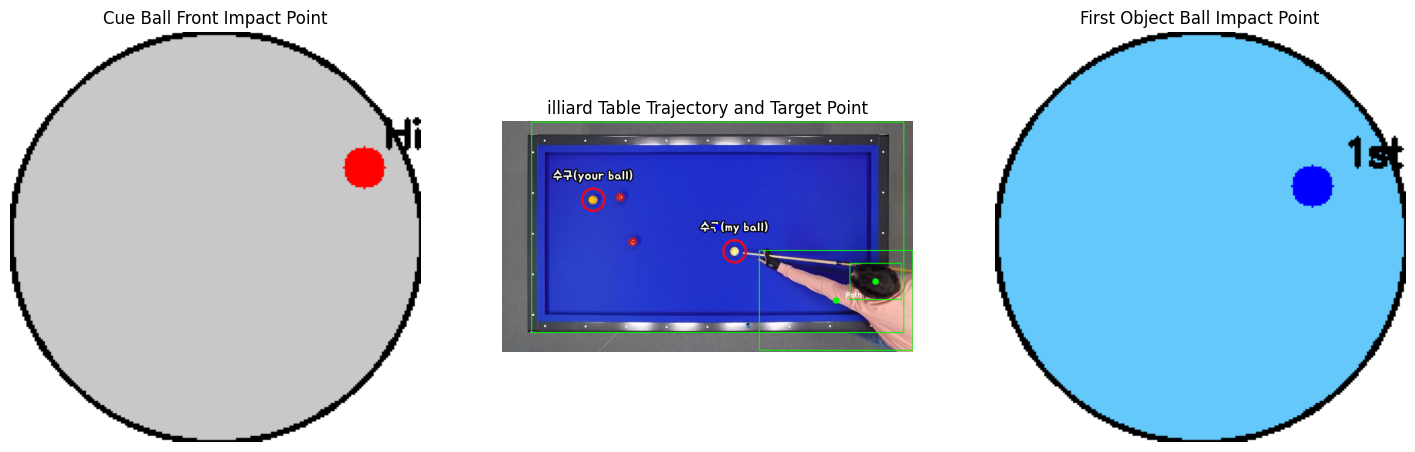

In [20]:
def visualize_full_guide(image, cue_ball, target_1, target_2):
    # ---- 1. 흰 공의 정면 시각화 ----
    radius = 100  # 픽셀 단위
    center = (radius, radius)
    cue_x, cue_y = (cue_ball[0] + cue_ball[2]) / 2, (cue_ball[1] + cue_ball[3]) / 2
    target1_x, target1_y = (target_1[0] + target_1[2]) / 2, (target_1[1] + target_1[3]) / 2

    # 방향 벡터 계산
    direction = np.array([target1_x - cue_x, target1_y - cue_y])
    direction = direction / np.linalg.norm(direction)
    hit_x = center[0] + int(direction[0] * radius * 0.8)
    hit_y = center[1] + int(direction[1] * radius * 0.8)

    # 흰 공 정면 시각화
    ball_image = np.ones((2 * radius, 2 * radius, 3), dtype=np.uint8) * 255
    cv2.circle(ball_image, center, radius, (200, 200, 200), -1)
    cv2.circle(ball_image, center, radius, (0, 0, 0), 2)
    cv2.circle(ball_image, (hit_x, hit_y), 10, (0, 0, 255), -1)
    cv2.putText(ball_image, "Hit Here", (hit_x + 10, hit_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    # ---- 2. 당구대 전체 뷰 ----
    trajectory = [(cue_x, cue_y), (target1_x, target1_y), ((target1_x + target1_x) / 2, (target1_y + target1_y) / 2)]
    for point in trajectory:
        cv2.circle(image, tuple(map(int, point)), 10, (0, 255, 0), -1)
    cv2.putText(image, "Path", (int(cue_x) + 30, int(cue_y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # ---- 3. 1적구 표면 시각화 ----
    target_ball_image = np.ones((2 * radius, 2 * radius, 3), dtype=np.uint8) * 255
    direction_to_2 = np.array([(target1_x - cue_x), (target1_y - cue_y)])
    direction_to_2 = direction_to_2 / np.linalg.norm(direction_to_2)
    target_hit_x = center[0] + int(direction_to_2[0] * radius * 0.6)
    target_hit_y = center[1] + int(direction_to_2[1] * radius * 0.6)
    cv2.circle(target_ball_image, center, radius, (250, 200, 100), -1)
    cv2.circle(target_ball_image, center, radius, (0, 0, 0), 2)
    cv2.circle(target_ball_image, (target_hit_x, target_hit_y), 10, (255, 0, 0), -1)
    cv2.putText(target_ball_image, "1st Ball Hit", (target_hit_x + 15, target_hit_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    # ---- 4. 화면 출력 ----
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(cv2.cvtColor(ball_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Cue Ball Front Impact Point")  # 수구 정면 명중 지점
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[1].set_title("illiard Table Trajectory and Target Point")  # 당구대 궤적 및 목표 지점
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(target_ball_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title("First Object Ball Impact Point")  # 1적구 명중 지점
    ax[2].axis('off')

    plt.show()

# 함수 호출
visualize_full_guide(image, detections[0], detections[1], detections[2])
